# Analysis of Yelp Business Intelligence Data

## Installation and Initial Setup

In [1]:
%info

In [2]:
sc.install_pypi_package("pandas==1.0.3")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1588531026458_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
sc.install_pypi_package("matplotlib==3.2.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.1
boto                       2.49.0
cycler                     0.10.0
jmespath                   0.9.4
kiwisolver                 1.2.0
lxml                       4.4.2
matplotlib                 3.2.1
mysqlclient                1.4.6
nltk                       3.4.5
nose                       1.3.4
numpy                      1.14.5
pandas                     1.0.3
pip                        20.1
py-dateutil                2.2
pyparsing                  2.4.7
python-dateutil            2.8.1
python36-sagemaker-pyspark 1.2.6
pytz                       2019.3
PyYAML                     3.11
setuptools                 46.1.3
six                        1.13.0
soupsieve                  1.9.5
wheel                      0.34.2
windmill                   1.6

### Importing

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Loading Data

In [6]:
df = spark.read.json('s3://big-data-project-ii/yelp_academic_dataset_business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Overview of Data

In [7]:
print(f'Total Columns: {len(df.dtypes)}')
print(f'Total Rows: {df.count():,}')
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 14
Total Rows: 209,393
root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable

In [8]:
cols = ['business_id','name', 'city', 'state', 'categories']
df.select(cols).show(5)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------------+-----+--------------------+
|         business_id|                name|           city|state|          categories|
+--------------------+--------------------+---------------+-----+--------------------+
|f9NumwFMBDn751xgF...|The Range At Lake...|      Cornelius|   NC|Active Life, Gun/...|
|Yzvjg0SayhoZgCljU...|   Carlos Santo, NMD|     Scottsdale|   AZ|Health & Medical,...|
|XNoUzKckATkOD1hP6...|             Felinus|       Montreal|   QC|Pets, Pet Service...|
|6OAZjbxqM5ol29BuH...|Nevada House of Hose|North Las Vegas|   NV|Hardware Stores, ...|
|51M2Kk903DFYI6gnB...|USE MY GUY SERVIC...|           Mesa|   AZ|Home Services, Pl...|
+--------------------+--------------------+---------------+-----+--------------------+
only showing top 5 rows

## Analyzing Categories

### Association Table

In [9]:
from pyspark.sql.functions import explode
from pyspark.sql.functions import split

df2 = df.select('business_id', explode(split(df.categories, ", ")).alias("categories")).where('categories != ""').withColumnRenamed("categories", "category")
df2.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------------+
|         business_id|        category|
+--------------------+----------------+
|f9NumwFMBDn751xgF...|     Active Life|
|f9NumwFMBDn751xgF...|Gun/Rifle Ranges|
|f9NumwFMBDn751xgF...|     Guns & Ammo|
|f9NumwFMBDn751xgF...|        Shopping|
|Yzvjg0SayhoZgCljU...|Health & Medical|
+--------------------+----------------+
only showing top 5 rows

### Total Unique Categories

In [ ]:
print(f'Total Rows: {df2.groupby('category').agg(f.count('category').alias('count')).count():,}')

### Top Categories By Business

#### Counts of Business / Category

In [10]:
import pyspark.sql.functions as f

df2.groupby('category').agg(f.count('category').alias('count')).show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-----+
|           category|count|
+-------------------+-----+
|     Paddleboarding|   36|
|     Dermatologists|  341|
|   Historical Tours|   54|
|   Hot Air Balloons|   21|
|Mobile Home Dealers|   16|
|      Data Recovery|  195|
|      Videographers|  169|
|      Skating Rinks|  104|
|             Fondue|   54|
|    Pet Photography|   49|
|  Pet Waste Removal|   34|
|        Boat Repair|  100|
|            Beaches|   74|
|       Contract Law|   13|
|       Aerial Tours|   28|
|  Signature Cuisine|    1|
|        Hobby Shops|  828|
|           Day Spas| 2880|
|              Reiki|  312|
|           Honduran|    8|
+-------------------+-----+
only showing top 20 rows

In [ ]:
Bar Chart of Top Categories

In [11]:
df3 = df2.groupby('category').agg(f.count('category').alias('count')).orderBy('count', ascending=False).limit(20).toPandas()
df3.set_index('category',drop=True,inplace=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

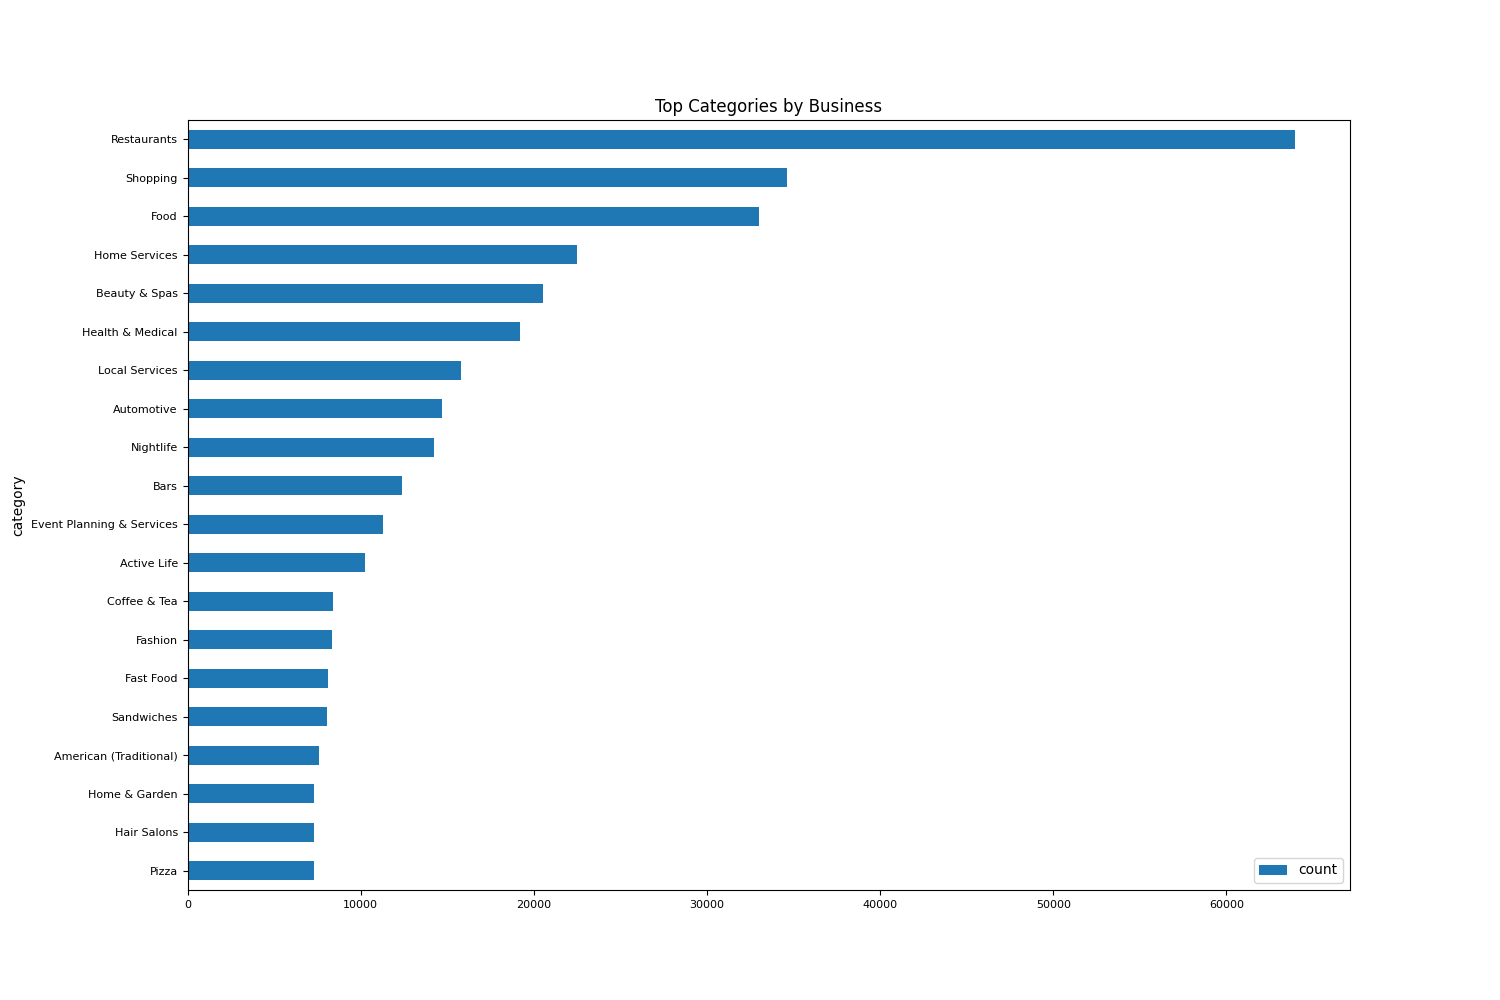

In [12]:
df3.sort_values('count',inplace=True)
df3.plot(kind='barh',title ="Top Categories by Business", figsize=(15, 10), legend=True, fontsize=8)
%matplot plt

## Do Yelp Reviews Skew Negative?

### Loading Review Data

In [13]:
df10 = spark.read.json('s3://big-data-project-ii/yelp_academic_dataset_review.json')
df10.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

In [14]:
cols = ['business_id','stars']
df10.select(cols).show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|-MhfebM0QIsKt87iD...|  2.0|
|lbrU8StCq3yDfr-QM...|  1.0|
|HQl28KMwrEKHqhFrr...|  5.0|
|5JxlZaqCnk1MnbgRi...|  1.0|
|IS4cv902ykd8wj1TR...|  4.0|
+--------------------+-----+
only showing top 5 rows

In [15]:
df11 = df10.where('text != ""').select(cols).groupby('business_id').mean()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [16]:
df11.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|        avg(stars)|
+--------------------+------------------+
|ATeOjZzE3VOI-RW7F...| 3.433734939759036|
|RMjCnixEY5i12Ciqn...|3.5316455696202533|
|vbUABNAQI2iwN7v0x...|2.4545454545454546|
|VHsNB3pdGVcRgs6C3...| 3.411764705882353|
|r-W1HPIZ3V6S2DaXh...| 4.852459016393443|
+--------------------+------------------+
only showing top 5 rows

In [17]:
df20 = df11.join(df, on='business_id').orderBy('avg(stars)', ascending=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [18]:
cols = ['avg(stars)', 'stars', 'name', 'city', 'state']
df21 = df20.select(cols)
df21.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----+--------------------+---------+-----+
|avg(stars)|stars|                name|     city|state|
+----------+-----+--------------------+---------+-----+
|       5.0|  5.0|         Print Smart| Chandler|   AZ|
|       5.0|  5.0|Martial Arts Cent...|Las Vegas|   NV|
|       5.0|  5.0|     Herbology Tours|Las Vegas|   NV|
|       5.0|  5.0|             Rococoa|  Toronto|   ON|
|       5.0|  5.0|Just Teazzin Hair...|     Mesa|   AZ|
+----------+-----+--------------------+---------+-----+
only showing top 5 rows

In [19]:
df22 = df21.withColumn('Skew', ( df21['avg(stars)'] - df21['stars'] ) / df21['stars'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
df22.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----+--------------------+--------------+-----+----+
|avg(stars)|stars|                name|          city|state|Skew|
+----------+-----+--------------------+--------------+-----+----+
|       5.0|  5.0|Devoted Fitness &...|Cuyahoga Falls|   OH| 0.0|
|       5.0|  5.0|Ultimate Training...|     Las Vegas|   NV| 0.0|
|       5.0|  5.0|      New Leaf Farms| Garrettsville|   OH| 0.0|
|       5.0|  5.0|             E-Tires|       Toronto|   ON| 0.0|
|       5.0|  5.0|    Reformed Pilates|       Phoenix|   AZ| 0.0|
+----------+-----+--------------------+--------------+-----+----+
only showing top 5 rows

In [21]:
df22.toPandas().hist(column='Skew', bins = 100)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae6ffcc390>]],
      dtype=object)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

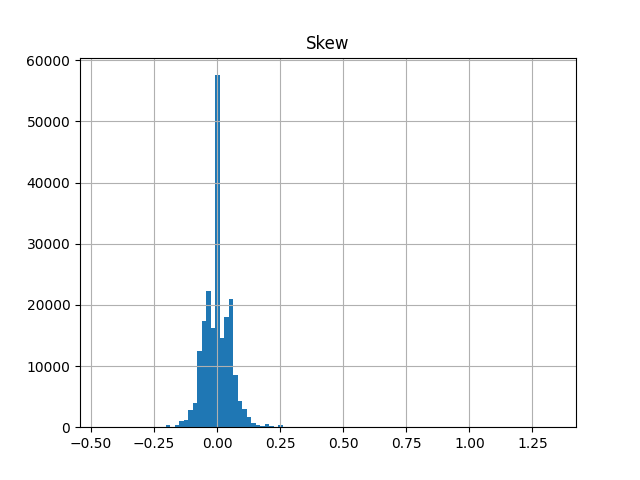

In [22]:
%matplot plt

It's not easy to confirm that reviewers who wrote an actual review tend to give more or less stars than other reviewers who didn't write because the histogram above is symmetrical with respect to x = 0.

### Additional Analysis 1

In [23]:
df22.select(['state', 'Skew']).groupby('state').mean().orderBy('avg(Skew)', ascending=True).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+--------------------+
|state|           avg(Skew)|
+-----+--------------------+
|   BC|-0.11111111111111116|
|   OR|-0.06666666666666661|
|   YT|-0.06666666666666661|
|   AK|-0.06666666666666661|
|  DUR|-0.06666666666666661|
|   CT|             -0.0625|
|   MB|-0.04861111111111116|
|  HPL|-0.03703703703703...|
|   NE|-0.03703703703703...|
|   VT|-0.03333333333333336|
|   HI|-0.02941176470588236|
|  XWY|-0.02222222222222...|
|   CA|-0.01892426945781...|
|   AR|-0.00952380952380949|
|   TX|-0.00773232179792...|
|   WA|-0.00119047619047...|
|   WI|-0.00116606085321...|
|   UT|                 0.0|
|   AB|3.695245386096834E-4|
|   AZ|4.348098696653177...|
+-----+--------------------+
only showing top 20 rows

As shown above, the reviewers in British Columbia(Canada) are the most likely to give less stars when they write a text review. That means that active reviewer in British Columbia are less generous than other reviewers that just give stars without any text.

### Additional Analysis 2

In [40]:
df.toPandas().hist(column='stars', bins = 100)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae6de841d0>]],
      dtype=object)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

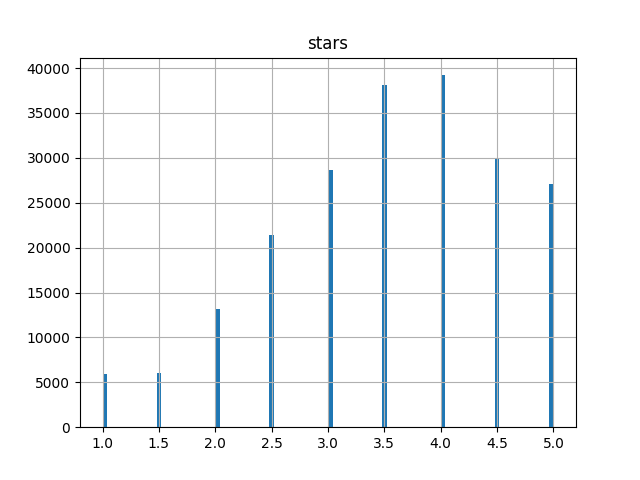

In [41]:
%matplot plt

The distribution of stars in Yelp is left skewed and mode is around 4.0. Therefore, 4 stars doesn't mean good quality of any product.

## Should the Elite be Trusted?

### Analysis 1

In [34]:
df30 = spark.read.json('s3://big-data-project-ii/yelp_academic_dataset_user.json')
df30.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

In [54]:
df31 = df30.join(df10, on='user_id')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [68]:
df31.select(['average_stars', 'stars']).withColumn('diff', (col('average_stars')-col('stars'))/col('stars')).toPandas().hist(column='diff', bins = 100)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae6b6a5fd0>]],
      dtype=object)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

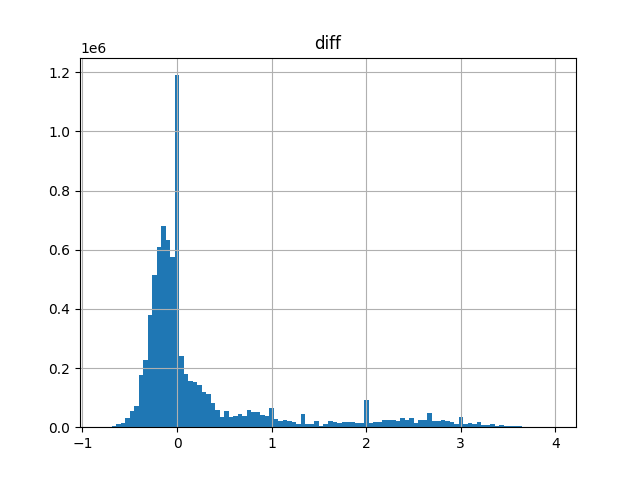

In [69]:
%matplot plt

The average stars tend to be higher than stars by Elite because the distribution of the difference is right skewed and the mean of this distribution is a positive number.

### Analysis 2

Average stars of Elite

In [38]:
from pyspark.sql.functions import mean as _mean, stddev as _stddev, col

df30.select(
    _mean(col('average_stars')).alias('mean'),
    _stddev(col('average_stars')).alias('std')
).collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(mean=3.6480868216283047, std=1.172525494200724)]

In [27]:
print(f'Total Columns: {len(df30.dtypes)}')
print(f'Total Rows: {df30.count():,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 22
Total Rows: 1,968,703

Average stars of Review

In [28]:
df11.select(
    _mean(col('avg(stars)')).alias('mean'),
    _stddev(col('avg(stars)')).alias('std')
).collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(mean=3.5343042366202675, std=1.015208847516822)]

In [29]:
print(f'Total Columns: {len(df10.dtypes)}')
print(f'Total Rows: {df10.count():,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 9
Total Rows: 8,021,122

Average stars of Business

In [30]:
df.select(
    _mean(col('stars')).alias('mean'),
    _stddev(col('stars')).alias('std')
).collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(mean=3.5380552358483808, std=1.0235430346225864)]

In [31]:
print(f'Total Columns: {len(df.dtypes)}')
print(f'Total Rows: {df.count():,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 14
Total Rows: 209,393

As we see the mean and standard deviation of three datasets, there isn't significant difference between them because the difference between means is less than 1 and all the standard deviation is greater than 1. In other words, we can use the smaller dataset to measure the customers satisfaction. Therefore, we can save computing power by using business dataset or user dataset instead of review dataset. 